In [ ]:
pip install wordcloud

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


    creating build
    creating build\lib.win-amd64-3.9
    creating build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\_version.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\__main__.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
    UPDATING build\lib.win-amd64-3.9\wordcloud/_version.py
    set build\lib.win-amd64-3.9\wordcloud/_version.py to '1.8.1'
    running build_ext
    building 'wordcloud.query_integral_image' extension
    error: Microsoft Visual C++ 1

True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import pandas as pd
from nltk.stem import WordNetLemmatizer
from gensim.models.coherencemodel import CoherenceModel
import re
#remove the punctuations and symbols
df = pd.read_csv("posts_data_with_topics_and_sentiments.csv");
punctuations = '''!@#$%^&*()[].''"",'''
count1 = 0
 #characters to be removed in the text
count1 = df.count()
l = []
email = []
text_with_no_punc = []
for i in range(0,100):
    row = []
    row.append(df.text[i])
    l.append(row)
for j in range(0,100):
    no_punc = ''
    row = []
    for i in l[j][0]:
        if(i not in punctuations):
            no_punc = no_punc + i
    row.append(no_punc)
    text_with_no_punc.append(row)
    
for j in range(0,100):
    text_with_no_punc[j] = word_tokenize(text_with_no_punc[j][0])
df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,fake_index,text,numsComs,comments,index,tokens,f_index,score_vaderSentiment,score_tblobSentiment,score_sentiwordnetSentiment,Unnamed: 13,Unnamed: 14
0,1,0.598,"emot, matter, exist, believ, realiz, human, fu...",0,I think Coronavirus is good..Don't need to dev...,5,"['This perspective of any sort of ""depression""...",0,"['think', 'coronaviru', 'good', 'need', 'devel...",0,1,1,1,NaN,NaN
1,2,0.332,"medic, therapist, doctor, med, diagnos, hospit...",1,When Trump almost started a World War a month ...,0,[],1,"['trump', 'start', 'world', 'help', 'feel', 'e...",1,0,1,0,NaN,NaN
2,2,0.4808,"medic, therapist, doctor, med, diagnos, hospit...",2,I was suffering with what I believed was depre...,3,"[""No, the doctor said I'm fine.\nMy parents sa...",2,"['suffer', 'believ', 'depress', 'spent', 'ever...",2,0,0,0,NaN,NaN
3,2,0.3776,"medic, therapist, doctor, med, diagnos, hospit...",3,It is so hard to gather my thoughts but I will...,1,"[""I can't say for sure either way, but there a...",3,"['hard', 'gather', 'thought', 'best', 'morn', ...",3,1,1,1,NaN,NaN
4,1,0.2714,"emot, matter, exist, believ, realiz, human, fu...",4,I'm normal on the surface. \n\nA company recen...,0,[],4,"['normal', 'surfac', 'compani', 'hire', 'wait'...",4,1,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,6,0.4364,"class, studi, grade, fail, univers, student, s...",11802,I don't understand how people manage to live t...,12,['I feel the same and have felt it. brother or...,11930,"['understand', 'peopl', 'manag', 'live', 'life...",11802,0,0,1,NaN,NaN
11810,2,0.5293,"medic, therapist, doctor, med, diagnos, hospit...",11803,I(37F) have struggled with anxiety and depress...,0,[],11931,"['struggl', 'anxieti', 'depress', 'long', 'rem...",11803,0,0,0,NaN,NaN
11811,2,0.7667,"medic, therapist, doctor, med, diagnos, hospit...",11804,Ok so I should propably start this off by sayi...,2,['You need to be really assertive about gettin...,11932,"['start', 'say', 'germani', 'english', 'live',...",11804,0,1,0,NaN,NaN
11812,2,0.5044,"medic, therapist, doctor, med, diagnos, hospit...",11805,"Throwaway account, trigger warning: suicidal i...",0,[],11933,"['account', 'trigger', 'warn', 'suicid', 'idea...",11805,0,0,0,NaN,NaN


In [3]:
#StopWords
stop_words = stopwords.words('english')
stop_words1 = stopwords.words('english')
                             
for i in range(0,len(stop_words)):
    stop_words[i] = stop_words[i].capitalize()
for i in stop_words1:
    stop_words.append(i)
stop_words.append('im')

#extracting emails
for i in range(0,len(text_with_no_punc)):
    for j in range(0,len(text_with_no_punc[i])):
        email = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\+_]+\.[a-z]+",text_with_no_punc[i][j])
text_with_no_email = []
for i in range(0,len(text_with_no_punc)):
    row = []
    for j in range(0,len(text_with_no_punc[i])):
        if text_with_no_punc[i][j] not in email:
              row.append(text_with_no_punc[i][j])
    text_with_no_email.append(row)
    
#removing stop words
for j in range(0,100):
    row = []
    for i in text_with_no_email[j]:
        if(i not in stop_words):
            row.append(i)
    text_with_no_email[j] = row
text_with_no_email[0]

['think',
 'Coronavirus',
 'goodDont',
 'need',
 'develop',
 'cure',
 'Corona',
 'good',
 'population',
 'control',
 'cure',
 'comes',
 'human',
 'certainly',
 'way',
 'much',
 'cause',
 'major',
 'problem',
 'earth',
 'like',
 'pollution',
 'many',
 'died',
 'finest',
 'ones',
 'remain',
 'great',
 'guess']

In [4]:
#Stemming 
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()
#new_list = []
#for i in range(0,100):
#    words = []
#    for word in l[i]:
#        words.append(stemmer.stem(word))
#    new_list.append(words)
#new_list[2]

#Lemmatization convert a word to a dictionary form 
lemmatizer = WordNetLemmatizer()
new_list = []
for i in range(0,100):
    words = []
    for word in text_with_no_email[i]:
        words.append(lemmatizer.lemmatize(word))
    new_list.append(words)
#merge the words into a correct sequence
for i in range(0,100):
    new_words = ''
    for word in new_list[i]:
        new_words = new_words + word + ' '
    new_list[i] = new_words
for i in range(0,len(new_list)):
      new_list[i] = word_tokenize(new_list[i])
count_words = 0
new_list
st1 = 'Im'
st2 = 'im'
st3 = 'ia'
for i in range(0,100):
    if('im' in new_list[i]):
        new_list.remove(st)
    if('Im' in new_list[i]):
        new_list[i].remove(st1)
    if('ia' in new_list[i]):
        new_list

In [5]:
#Make the words lower case
word = []
for i in new_list:
    l = []
    p = ''
    for j in i:
        p = p + j.lower() + ' '
    l.append(p)
    word.append(p)
word[0]

'think coronavirus gooddont need develop cure corona good population control cure come human certainly way much cause major problem earth like pollution many died finest one remain great guess '

In [6]:
#Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
sents =  word
cv = CountVectorizer()
X = cv.fit_transform(sents)
df_count = []
for i in range(0,100):
    df1 = pd.DataFrame(X[i].T.todense(),
                  index=cv.get_feature_names(), columns=["COUNT"])
    df1 = df1.sort_values('COUNT', ascending=False)
    df_count.append(df1)
df1.iloc[2:40,:]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,COUNT
feel,3
friend,3
parent,3
much,2
potentially,2
help,2
home,2
talk,2
know,2
counseling,2


In [7]:
#Tf-idf vectorization
sent2 = word
#print(cv.get_feature_names())
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(sent2)
x.toarray()
df2 = []
for i in range(0,100):
  df3 = pd.DataFrame(x[i].T.todense(),
                  index=tf.get_feature_names(), columns=["TF-IDF"])
  df3 = df3.sort_values('TF-IDF', ascending=False)
  df2.append(df3)
df2

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[              TF-IDF
 cure        0.467929
 gooddont    0.233964
 develop     0.233964
 remain      0.233964
 population  0.233964
 ...              ...
 figure      0.000000
 fill        0.000000
 filled      0.000000
 filling     0.000000
 žðÿ         0.000000
 
 [2842 rows x 1 columns],
                TF-IDF
 war          0.221665
 die          0.202117
 excited      0.192331
 found        0.185332
 feel         0.176469
 ...               ...
 finally      0.000000
 financial    0.000000
 financially  0.000000
 find         0.000000
 žðÿ          0.000000
 
 [2842 rows x 1 columns],
            TF-IDF
 person   0.467201
 met      0.258311
 helped   0.247409
 reddit   0.192564
 another  0.173846
 ...           ...
 first    0.000000
 fit      0.000000
 five     0.000000
 fix      0.000000
 žðÿ      0.000000
 
 [2842 rows x 1 columns],
                TF-IDF
 wan          0.298472
 year         0.233346
 na           0.218908
 im           0.184047
 later        0.176476
 ...      

In [9]:
from wordcloud import WordCloud 

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#WordCloud visualization for each doucument
import matplotlib.pyplot as plt
for i in range(0,10):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(df['text'][i])
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)

In [8]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(new_list)
id2word.items()
corpus = [id2word.doc2bow(text) for text in new_list]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(1, 1),
  (11, 1),
  (16, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 4),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 2),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1)

In [9]:
#Latent Dirichilet Allocation
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=12, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,                               
                                random_state = 0)

lda_model = lda.fit_transform(x)

In [10]:
def print_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(2, 6, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    l = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) 
        st = ([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        l.append(st)
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.8)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("title", fontsize=40)
    return l
                          
    #print(model.components_)
    print()


In [11]:
def print_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(2, 6, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    l = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) 
        st = ([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        l.append(st)
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("title", fontsize=40)
    return l
                          
    #print(model.components_)
    print()


Topics in LDA model: 

Topic #0:


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


often number happy tear worse overcome bathroom paranoid want text ended toothache unless flirt toeing
Topic #1:
else iâ even hit bit mexico humor friend originated really good likely finish neighbouring considering
Topic #2:
difficulty get biggest planet locust besides shouldnt work fucked scum seeing begged prescription breakup gather
Topic #3:
flu dealt problem style screen meant swipe studied 10kgs wait behind today immune hero friendly
Topic #4:
luck february guilt glove without brave helpless need 2019 frustrated grown obsessed response bare alright
Topic #5:
nervous important mad branch hey whatsoever 40 euro leaning to creature number false cried sub
Topic #6:
virus brighter suffer not amount making medicine no soon shot branch helpless summer point min
Topic #7:
addicted positive always balance square home without waiting iâ gateway much highly x200b panic going
Topic #8:
worried hopeless consequence anyone blameless else excited alright friend side attending eaten adderall ta

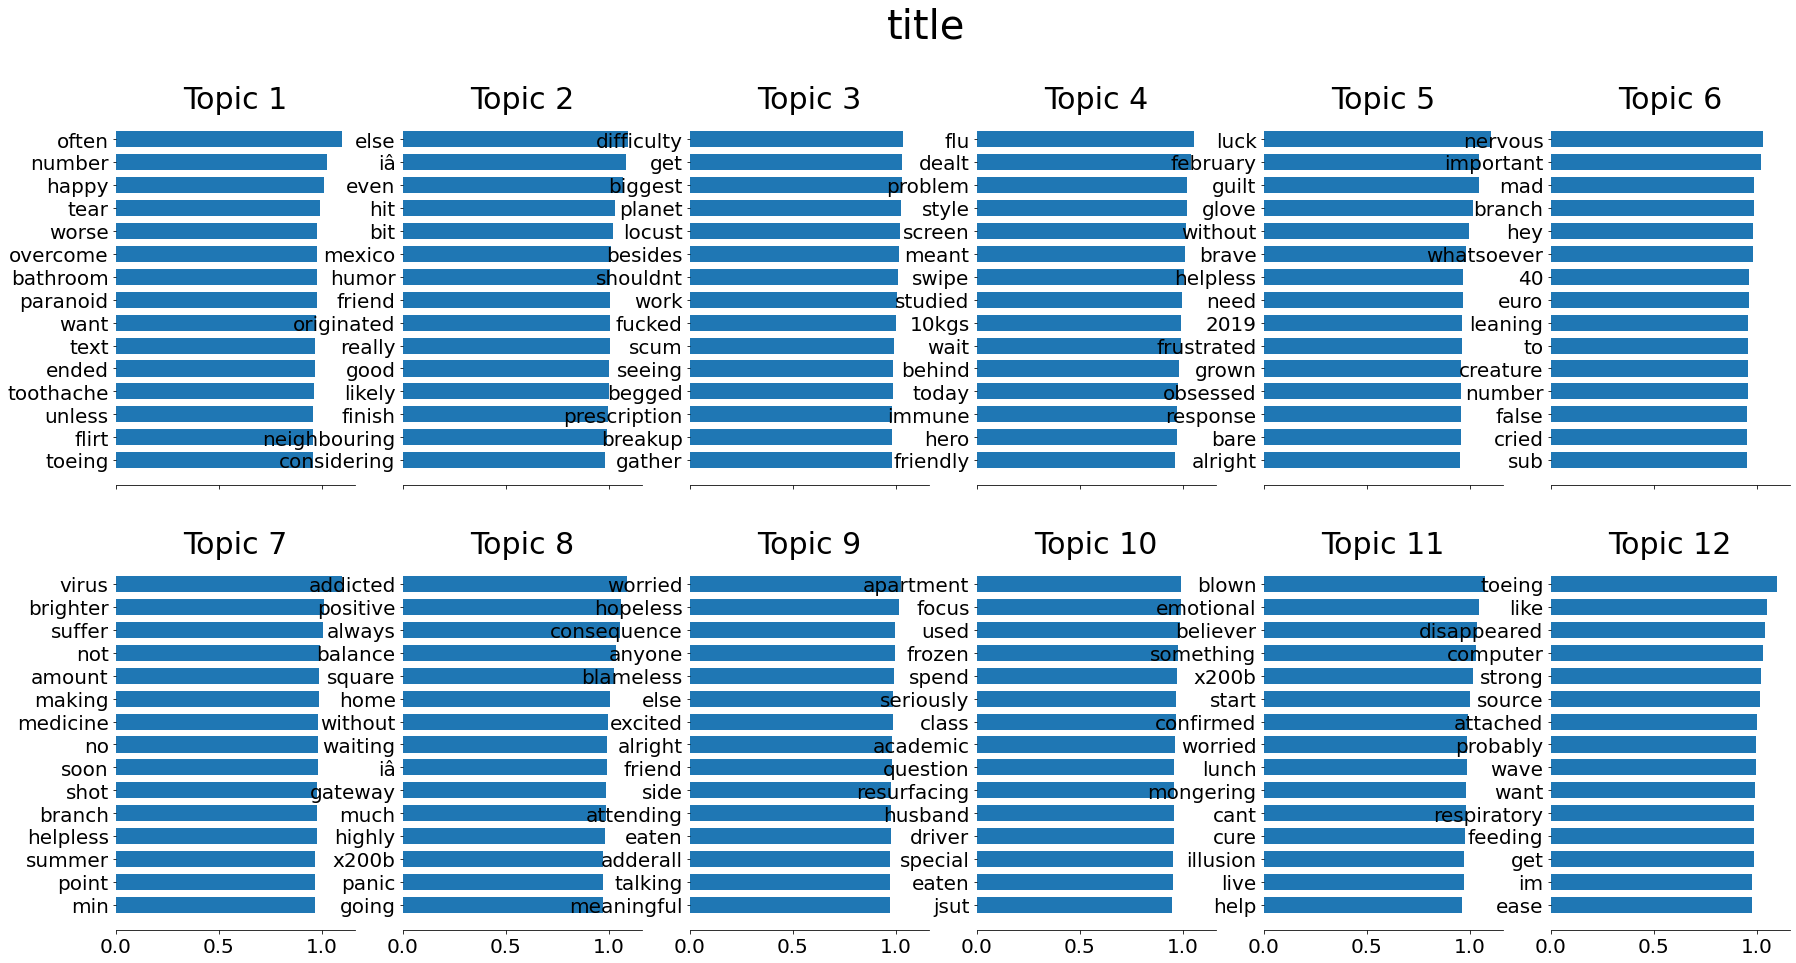

In [12]:
n_top_words = 15
print("\nTopics in LDA model: ")
tf_feature_names = tf.get_feature_names()
print()
l = print_top_words(lda, tf_feature_names, n_top_words)
print()
print(l)
print()
print(lda.components_)

In [40]:
#T-SNE for dimensionality reduction and display topics in 2-d format
from sklearn.manifold import TSNE
tsne_lda_model = TSNE(n_components=3, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_model)
tsne_lda_vectors.shape

C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.754499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.573204
[t-SNE] KL divergence after 2000 iterations: 1.086698


(100, 3)

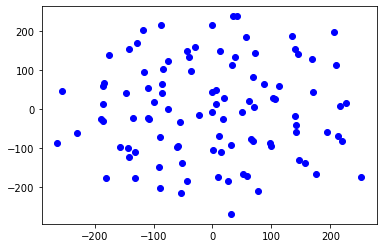

In [41]:
plt.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1],color = 'blue')

Text(0.5, 0, 'Number of topics')

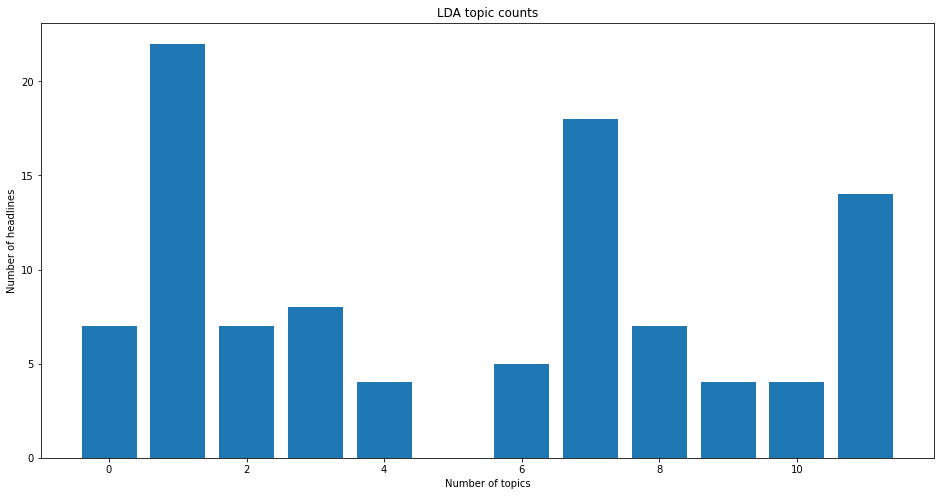

In [15]:
#DISPLAYING THE LDA TOPIC COUNTS
count_pairs = ''
from collections import Counter
keys = lda_model.argmax(axis=1).tolist()
count_pairs = Counter(keys).items()
categories = [pair[0] for pair in count_pairs]
counts = [pair[1] for pair in count_pairs]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(categories, counts);
#ax.set_xticks(categories);
#ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');
ax.set_xlabel('Number of topics')

In [16]:
print("LOG LIKELIHOOD :",lda.score(x))
print("PERPLEXITY :",lda.perplexity(x))

LOG LIKELIHOOD : -42313.4298922212
PERPLEXITY : 6.602250700839788e+23


In [17]:
#NON-MATRIX FACTORIZATION
from sklearn.decomposition import NMF 
nmf = NMF(
    n_components=12,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
)
nmf_model = nmf.fit_transform(x)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topics in NMF model: 



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0:
im feel like really get want year dont thing know one cant even ive time
Topic #1:
iâ donâ itâ ve canâ forward rly know parent something car want look going pay
Topic #2:
kid mexico might old mexican american school covid wanted selfish ended treated œweird 2007 stage
Topic #3:
die would world depressed human earth life stop kill many people planet catch think cure
Topic #4:
ðÿ basically summer dont got jump live hope building ever becos class member suspended teacher
Topic #5:
gym week shift dont could new go missed corona time situation going wouldnt one left
Topic #6:
person might happens day suicide coronavirus get hopefully walk hope without blameless excited die either
Topic #7:
study watching feeling test like im feel amount small constantly coronavirus x200b also result amp
Topic #8:
ive suffer im ok dont first planned pain pretty trip know looked anxiety lot shes
Topic #9:
worried cant virus stop small china else none think family hope anyone within sad everything
To

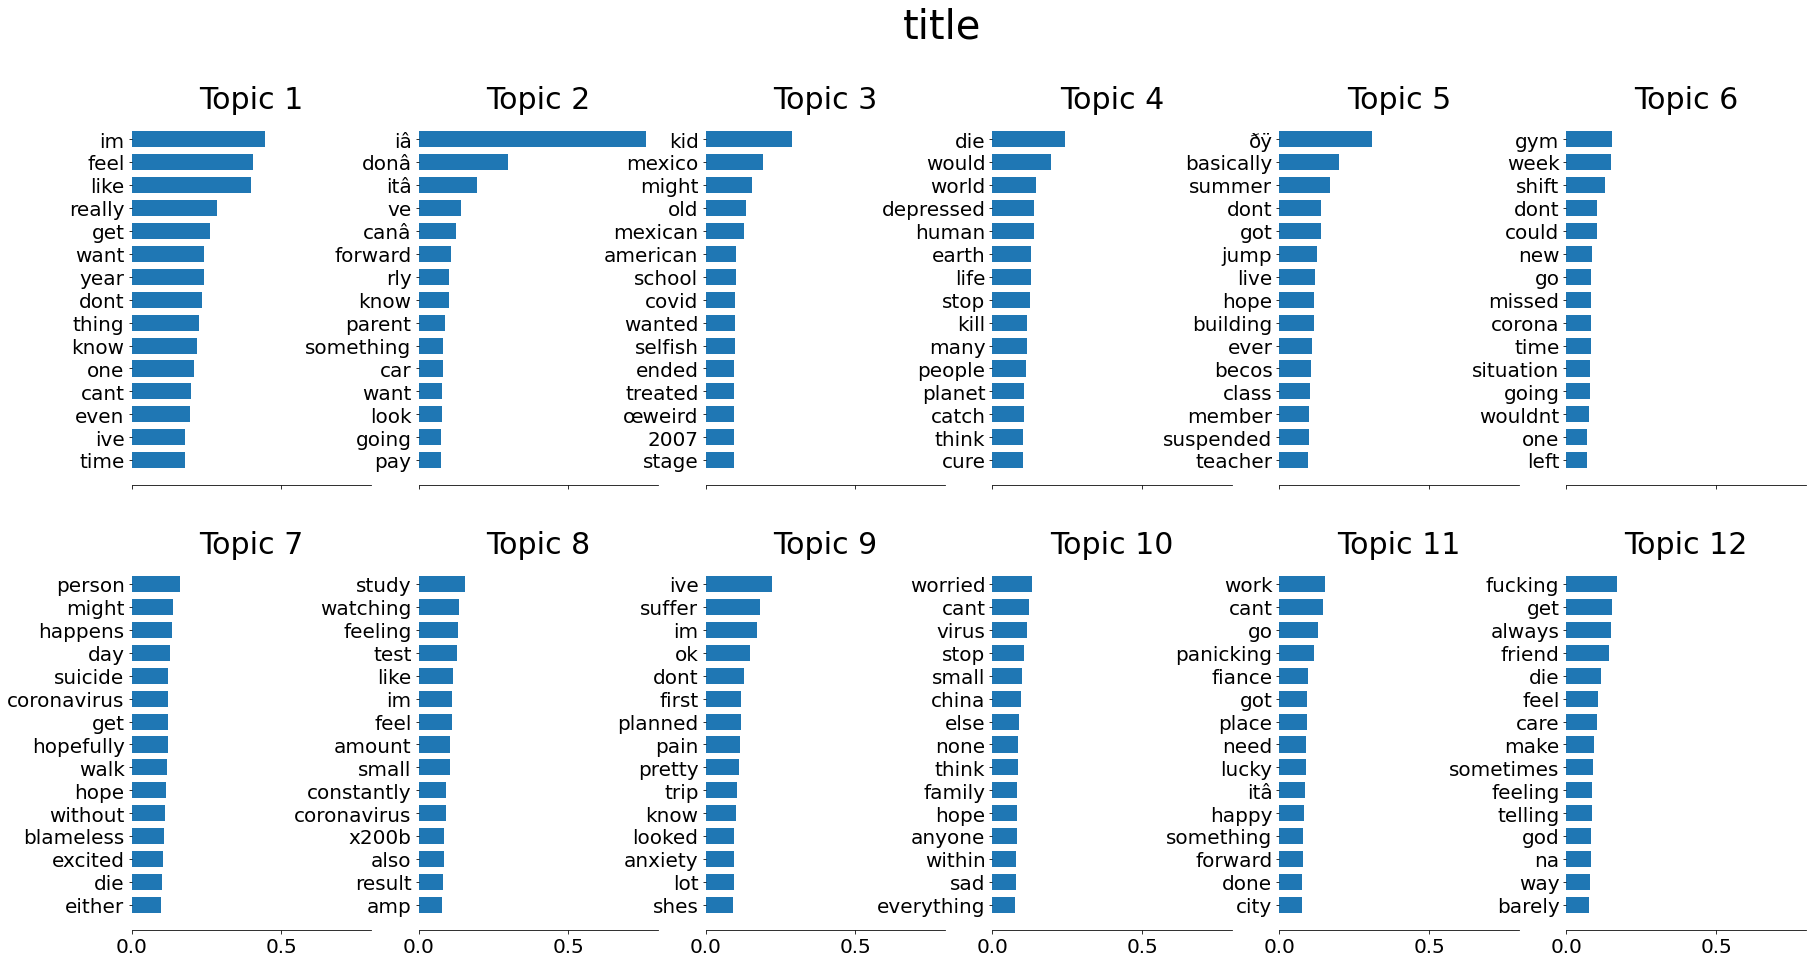

In [18]:
n_top_words = 15
print("\nTopics in NMF model: ")
tf_feature_names = tf.get_feature_names()
print()
print_top_words(nmf, tf_feature_names, n_top_words)
print()

Text(0.5, 0, 'Number of topics')

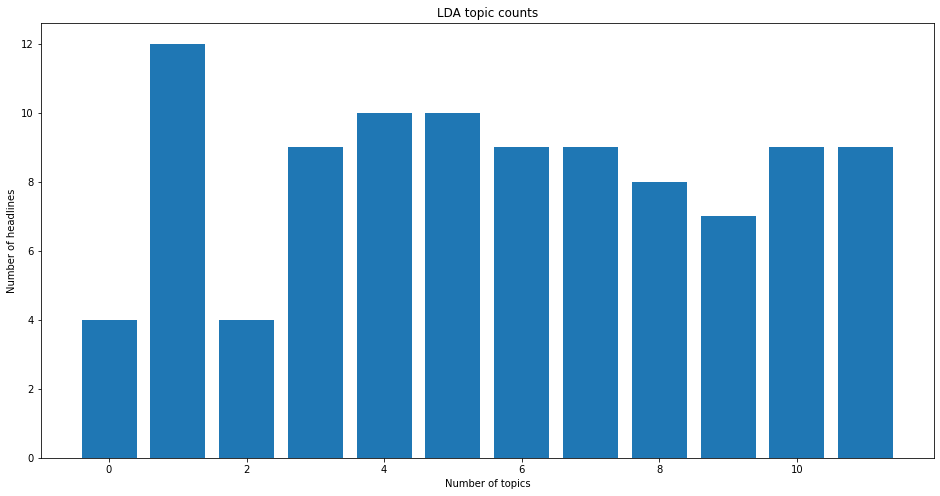

In [19]:
#Displying the NMF topic counts
count_pairs = ''
from collections import Counter
keys = nmf_model.argmax(axis=1).tolist()
count_pairs = Counter(keys).items()
categories = [pair[0] for pair in count_pairs]
counts = [pair[1] for pair in count_pairs]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(categories, counts);
#ax.set_xticks(categories);
#ax.set_xticklabels(labels);
ax.set_title('NMF topic counts');
ax.set_ylabel('Number of headlines');
ax.set_xlabel('Number of topics')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

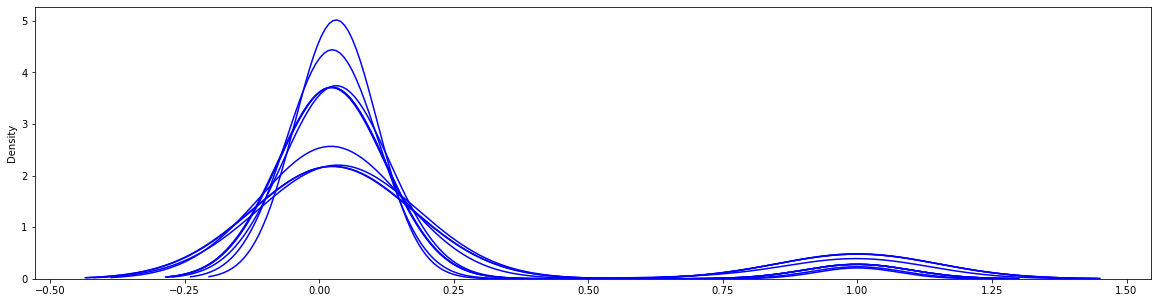

In [36]:
#Visualizing similarities between the tokens in the topics based on LDA model
from sklearn.metrics.pairwise import cosine_similarity
cosine_sin = cosine_similarity(lda_model)
cosine_sin
cos = pd.DataFrame(cosine_sin)
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,5))
for i in range(0,10):
    sns.distplot(cosine_sin[i],color='blue',hist=False)

In [ ]:
pip install pyLDAvis

In [26]:
import pyLDAvis.gensim_models
import pickle
pyLDAvis.enable_notebook
import pyLDAvis.sklearn
g = pyLDAvis.sklearn.prepare(lda,x,tf)
pyLDAvis.display(g)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [27]:
pyLDAvis.enable_notebook
g = pyLDAvis.sklearn.prepare(nmf,x,tf)
pyLDAvis.display(g)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Testing LDA with various n_components_ to predict best model

In [28]:
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(x)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [29]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(x))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -3002.8928441814764
Model Perplexity:  118168.26325658169


In [30]:
import numpy as np
lda_output = best_lda_model.transform(x)
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(new_list))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [31]:
pyLDAvis.enable_notebook
g = pyLDAvis.sklearn.prepare(best_lda_model,x,tf)
pyLDAvis.display(g)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [33]:
#Grouping the topics on each document
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(110).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.020000,0.850000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,1
Doc1,0.010000,0.490000,0.010000,0.430000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1
Doc2,0.010000,0.540000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.370000,0.010000,1
Doc3,0.010000,0.430000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.490000,9
Doc4,0.010000,0.340000,0.010000,0.590000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,3
Doc5,0.010000,0.350000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.570000,9
Doc6,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.830000,0.020000,0.020000,7
Doc7,0.010000,0.900000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1
Doc8,0.010000,0.920000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1
Doc9,0.020000,0.350000,0.520000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
